# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

This notebook is for the Eviction Data Case Study exercise in the "Actionable Ethics for Data Scientists" workshop at ODSC. We will be walking through data and deon ethics checklist in the notebook. We will have a group discussion where there is a <span style="color:green">**\*\*bolded green discussion question\*\***</span>. Some code relevant to the checklist items are provided, but you are encouraged to think of other things to look at and share with the group.

## Background

Over the past five decades, [housing costs have risen faster than incomes](http://www.jchs.harvard.edu/state-nations-housing-2018), low-cost housing has been disappearing from the market, and racial disparities in homeownership rates have deepened. This has put many in a perilous situation. As the [Eviction Lab](https://evictionlab.org/why-eviction-matters/#affordable-housing-crisis) explains:

> Today, most poor renting families spend at least half of their income on housing costs, with one in four of those families spending over 70 percent of their income just on rent and utilities. Only one in four families who qualify for affordable housing programs get any kind of help. Under those conditions, it has become harder for low-income families to keep up with rent and utility costs, and a growing number are living one misstep or emergency away from eviction.


## Objective

A non-profit dedicated to helping people at risk of eviction in California has tasked us to build a model to estimate the number of eviction cases by geography, based on socioeconomic data. They would like to use these estimates to help them prioritize where to commit funding and resources.

We will be using a subset of the eviction dataset published by the [Eviction Lab](https://evictionlab.org/) at Princeton University. The subset is the census-tract-level aggregates for only tracts in the state of California. 

## Loading the Data

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns
import wget

%matplotlib inline
pd.set_option("display.max_columns", 30)

<IPython.core.display.Javascript object>

In [3]:
DATA_URL = "https://drivendata-public-assets.s3.amazonaws.com/odsc-west-2019/california-tracts.csv"
DATA_PATH = "../data/raw/california-tracts.csv"

# Set standard fig size for plots
FIGSIZE = (10, 10)

<IPython.core.display.Javascript object>

In [4]:
if not os.path.exists(DATA_PATH):
    # Download data
    wget.download(url=DATA_URL, out=DATA_PATH)

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv(DATA_PATH)
print(df.shape)
print(df.dtypes)
df.head()

(136958, 27)
GEOID                           int64
year                            int64
name                          float64
parent-location                object
population                    float64
poverty-rate                  float64
renter-occupied-households    float64
pct-renter-occupied           float64
median-gross-rent             float64
median-household-income       float64
median-property-value         float64
rent-burden                   float64
pct-white                     float64
pct-af-am                     float64
pct-hispanic                  float64
pct-am-ind                    float64
pct-asian                     float64
pct-nh-pi                     float64
pct-multiple                  float64
pct-other                     float64
eviction-filings              float64
evictions                     float64
eviction-rate                 float64
eviction-filing-rate          float64
low-flag                        int64
imputed                         int64

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,6001400100,2000,4001.0,"Alameda County, California",2497.87,2.93,108.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,0.0,0.0,0.00,0.00,1,0,0
1,6001400100,2001,4001.0,"Alameda County, California",2497.87,2.93,117.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,1.0,0.0,0.00,0.86,1,0,0
2,6001400100,2002,4001.0,"Alameda County, California",2497.87,2.93,126.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,1.0,1.0,0.80,0.80,1,0,0
3,6001400100,2003,4001.0,"Alameda County, California",2497.87,2.93,134.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,2.0,2.0,1.49,1.49,1,0,0
4,6001400100,2004,4001.0,"Alameda County, California",2497.87,2.93,143.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,0.0,0.0,0.00,0.00,1,0,0


<IPython.core.display.Javascript object>

In [6]:
# count = non-NaN observations; size = all observations
df.groupby("year").agg(
    count=("eviction-rate", "count"), size=("eviction-rate", "size")
).transpose()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,6622,6943,6871,6697,6584,6553,7018,7190,7190,7364,7254,6369,6335,6327,6739,6551,6615
size,8056,8056,8056,8056,8056,8056,8056,8056,8056,8056,8056,8057,8057,8057,8057,8057,8057


<IPython.core.display.Javascript object>

In [7]:
# Data Dictionary
DATA_DICT_URL = "https://drivendata-public-assets.s3.amazonaws.com/odsc-west-2019/DATA_DICTIONARY.txt"
DATA_DICT_PATH = "../references/DATA_DICTIONARY.txt"

if not os.path.exists(DATA_DICT_PATH):
    # Download data dictionary
    wget.download(url=DATA_DICT_URL, out=DATA_DICT_PATH)

<IPython.core.display.Javascript object>

In [8]:
!cat $DATA_DICT_PATH

Eviction Lab Data Dictionary

Additional information in our FAQ evictionlab.org/help-faq/
Full methodology evictionlab.org/methods/

Notes:
- All geographies are converted to their 2010 Census FIPS codes, names, and boundaries

Variables:

- GEOID
    - Census FIPS code
- name
    - Census location name (modified for display on map)
- parent-location
    - Parent location of given geography.
    - USA for states, state for counties and cities, counties for tracts and block groups
- population
    - Total population
    - 2000-2004 use 2000 Census SF1 P001001
    - 2005-2009 use 2009 5-year ACS B01003_001E
    - 2010 uses 2010 Census P0030001
    - 2011-2016 uses 2015 5-year ACS B01003_001E
- poverty-rate
    - % of the population with income in the past 12 months below the poverty level
    - 2000-2004 divides P087002 by P087001 in the 2000 Census summary file 3
    - 2005-2009 divides B17010_002E by B17010_001E in 2009 5-year ACS
    - 2010 divides B17010_002E by B17010_001E in 2012 5

<IPython.core.display.Javascript object>

## A. Data Collection

- [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

We are not directly collecting any data from human subjects. We are using a well-known, publicly published dataset published by a well-known research laboratory at a prestigious research university. The university has strong data protection guidelines documented [here](https://ria.princeton.edu/research-data-security). Furthermore, the data represents public records such as court records and census data. 

 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

Data sources are reported by Eviction Lab [here](https://evictionlab.org/help-faq/#data-source). In their [methodology details](https://evictionlab.org/docs/Eviction%20Lab%20Methodology%20Report.pdf), they note that some observations are marked as "low", meaning that Eviction Lab believes they are undercounted based on comparisons against county-level aggregate data reported by states. 

There has also been some further criticism from housing activists that Eviction Lab is undercounting evictions when compared against data from local activist organizations, especially informal evictions that don't go through the formal legal process. See:

1. https://shelterforce.org/2018/08/22/eviction-lab-misses-the-mark/
2. https://chieforganizer.org/2018/08/28/the-cracks-in-the-eviction-lab-wall-are-undercounting-the-crisis/

 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

The dataset we are using is aggregated at the census tract level and does not directly have PII in it. The Eviction Lab has individual household data but does not make those available publicly. Again, the university has strong data protection guidelines documented [here](https://ria.princeton.edu/research-data-security).

More generally, one potential pitfall is that in situations where groups are very small, there is potential to infer or associate information to individuals. We can actually see in the data that some tracts have very small counts of renter households. However, we don't have any PII-relevant fields in this dataset, and identification in this case would involve joining to other datasets that could independently be used to identify people. 

In [9]:
df["renter-occupied-households"].describe(percentiles=[0.001, 0.01, 0.05, 0.10])

count    136952.000000
mean        674.824800
std         492.442191
min           0.000000
0.1%          0.000000
1%            6.000000
5%          102.000000
10%         160.000000
50%         574.000000
max        6156.000000
Name: renter-occupied-households, dtype: float64

<IPython.core.display.Javascript object>

## B. Data Storage

 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

Since we are using a public dataset, this is not applicable.

 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?

Since we are using a public dataset and not collecting data from subjects directly, this is not applicable.

 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

Since we are using a public dataset, this is not applicable.

## C. Analysis

 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

As noted in A.2, there may be systemic undercounting of evictions due to the data collection process. In particular, for informal evictions that bypassed the formal legal process, there may be certain groups of people that an analysis based on this dataset is completely blind to. 

 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

<span style="color:green">**\*\*Discussion: What are possible sources of bias? Take some time to explore the data.\*\***</span> 

In [10]:
print(f"Proportion of observations with low-flag: {df['low-flag'].mean():.2f}")
print("Count of observations with low-flag")
df["low-flag"].value_counts()

Proportion of observations with low-flag: 0.72
Count of observations with low-flag


1    98441
0    38517
Name: low-flag, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
print(f"Proportion of observations with imputed flag: {df['imputed'].mean():.2f}")
print("Count of observations with imputed flag")
df["imputed"].value_counts()

Proportion of observations with imputed flag: 0.01
Count of observations with imputed flag


0    135192
1      1766
Name: imputed, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
df["evictions_is_na"] = df["evictions"].isna()
print(f"Proportion of Evictions Counts that are NA: {df['evictions_is_na'].mean():.2f}")
df["evictions_is_na"].value_counts()

Proportion of Evictions Counts that are NA: 0.16


False    115222
True      21736
Name: evictions_is_na, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# Helper function to expand y axis for plots
def expand_ylim():
    # Seaborn cuts off top and bottom with matplotlib 3.1.1, so we need to add padding.
    b, t = plt.ylim()  # get values for bottom and top
    b += 0.5  # Add 0.5 to the bottom
    t -= 0.5  # Subtract 0.5 from the top
    plt.ylim(b, t)  # reset ylim values

<IPython.core.display.Javascript object>

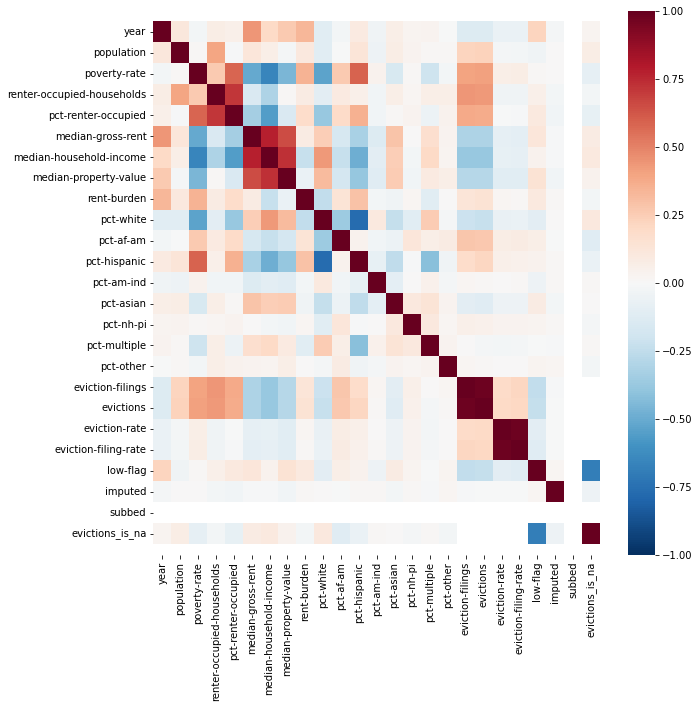

<IPython.core.display.Javascript object>

In [14]:
# Correlation heatmap
corr = df.loc[:, [col for col in df.columns if col not in ("GEOID", "name")]].corr()
plt.figure(figsize=FIGSIZE)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap="RdBu_r")

expand_ylim()
plt.show()

In [15]:
race_cols = [
    "pct-white",
    "pct-af-am",
    "pct-hispanic",
    "pct-am-ind",
    "pct-asian",
    "pct-nh-pi",
    "pct-multiple",
    "pct-other",
]
df[race_cols].describe(percentiles=[])

,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other
count,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000
mean,43.452164,5.994545,34.575192,0.472269,11.850210,0.325644,2.529993,0.253803
std,27.628941,9.969225,26.246277,1.463626,14.165121,0.864646,1.997365,0.544381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.190000,2.470000,26.495000,0.200000,6.770000,0.030000,2.280000,0.090000
max,100.000000,92.340000,100.000000,82.190000,94.180000,24.740000,100.000000,14.150000


<IPython.core.display.Javascript object>

In [16]:
# Calculate pairwise correlation of some column against race percentage columns
col_to_correlate = "low-flag"
race_cols = [
    "pct-white",
    "pct-af-am",
    "pct-hispanic",
    "pct-am-ind",
    "pct-asian",
    "pct-nh-pi",
    "pct-multiple",
    "pct-other",
]
df[race_cols + [col_to_correlate]].corr()[col_to_correlate][:-1]

pct-white      -0.108437
pct-af-am       0.070013
pct-hispanic    0.045566
pct-am-ind     -0.052412
pct-asian       0.079841
pct-nh-pi       0.025293
pct-multiple   -0.005826
pct-other       0.026254
Name: low-flag, dtype: float64

<IPython.core.display.Javascript object>

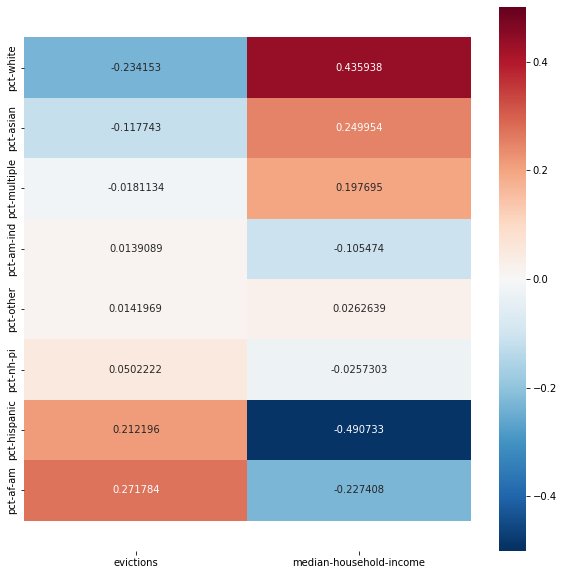

<IPython.core.display.Javascript object>

In [17]:
# Visualize the above correlations.
cols_to_correlate = ["evictions", "median-household-income"]
heatmap_df = pd.DataFrame(
    df[race_cols + cols_to_correlate].corr()[cols_to_correlate][:-2]
)

plt.figure(figsize=FIGSIZE)
sns.heatmap(
    heatmap_df.sort_values("evictions"),
    annot=True,
    fmt="g",
    cmap="RdBu_r",
    vmin=-0.5,
    vmax=0.5,
)

expand_ylim()

 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

We are not going to spend time in this exercise looking at examples of poor visualizations, but this is a good check to do for real projects.

 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

Mostly not applicable. We have no PII, but we do have some tracts with few observations. We need to be mindful of those and maybe exclude them from visualizations or combine them with neighboring tracts.

 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

Yes, all of our code is contained in this notebook. For real projects, this is an important point to consider in more depth.

## D. Modeling

Though discrimination may not be strictly a problem in this situation, the non-profit wants their decision-making to be race-blind, so they ask for the population race percentage features to not be included in the modeling.

In [18]:
TARGET_VAR = "evictions"
FEATURE_VARS = [
    "year",
    "population",
    "poverty-rate",
    "median-property-value",
    "renter-occupied-households",
    "pct-renter-occupied",
    "median-gross-rent",
    "median-household-income",
    "rent-burden",
    # Don't include race features
    #'pct-white' , 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
    #'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other'
]
GROUP_VAR = "GEOID"  # Prevent leakage

<IPython.core.display.Javascript object>

In [19]:
print(f"Original Shape: {df.shape}")
# Drop NAs in target variable
df_modeling = df.dropna(subset=[TARGET_VAR])
df_modeling.reset_index(inplace=True)
print(f"Shape without NAs: {df_modeling.shape}")

Original Shape: (136958, 28)
Shape without NAs: (115222, 29)


<IPython.core.display.Javascript object>

In [20]:
from sklearn.model_selection import GroupShuffleSplit, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

In [21]:
df_modeling.loc[:, TARGET_VAR].describe()

count    115222.000000
mean         11.417629
std          14.838183
min           0.000000
25%           2.000000
50%           7.000000
75%          15.000000
max         296.000000
Name: evictions, dtype: float64

<IPython.core.display.Javascript object>

In [22]:
split = GroupShuffleSplit(test_size=0.20, n_splits=2, random_state=36).split(
    df_modeling, groups=df_modeling.loc[:, GROUP_VAR]
)

train_inds, test_inds = next(split)

df_train = df_modeling.loc[train_inds, :]
df_test = df_modeling.loc[test_inds, :]

X_train = df_train.loc[:, FEATURE_VARS].values
y_train = df_train.loc[:, TARGET_VAR].values

X_test = df_test.loc[:, FEATURE_VARS].values
y_test = df_test.loc[:, TARGET_VAR].values

<IPython.core.display.Javascript object>

In [23]:
%%time
model_pipeline = Pipeline([
    ('med_impute', SimpleImputer(strategy='median')),
    ('model', RandomForestRegressor(
        criterion='mse',
        n_estimators=100, 
        max_depth=10,
        random_state=36
    ))
])
model_pipeline.fit(X_train, y_train)

/opt/anaconda3/envs/msc-buckingham-data-ethics/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 27.9 s, sys: 114 ms, total: 28 s
Wall time: 28.4 s


Pipeline(steps=[('med_impute', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestRegressor(criterion='mse', max_depth=10,
                                       random_state=36))])

<IPython.core.display.Javascript object>

In [24]:
y_pred = model_pipeline.predict(X_test)
print("R2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 0.4902906447471631
MSE 102.05521224494476
MAE 5.9859944311932445


<IPython.core.display.Javascript object>

 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

As noted, unfair discrimination is not directly an issue with this use case, but the non-profit wants the model not to factor in race. 


<span style="color:green">**\*\*Discussion: Are there concerns about proxy variables for race? Take some time to explore the data.\*\***</span> 

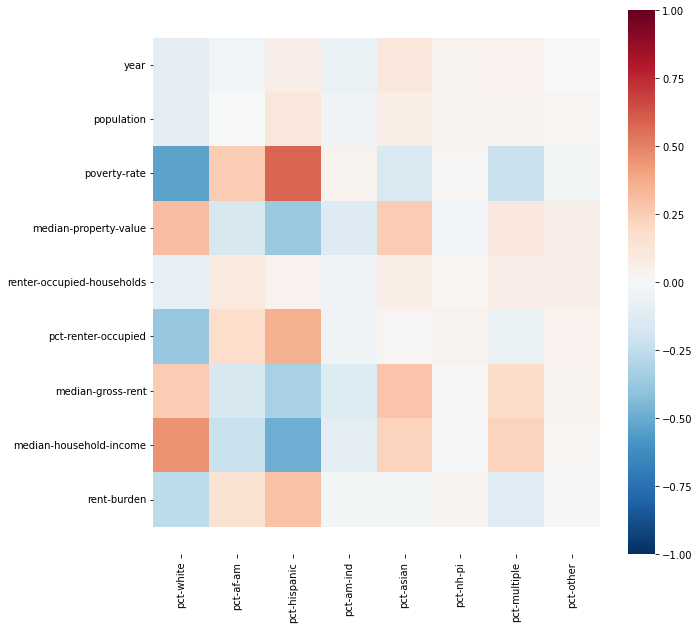

<IPython.core.display.Javascript object>

In [25]:
race_vars = [
    "pct-white",
    "pct-af-am",
    "pct-hispanic",
    "pct-am-ind",
    "pct-asian",
    "pct-nh-pi",
    "pct-multiple",
    "pct-other",
]
corr = df_modeling.loc[:, FEATURE_VARS + race_vars].corr().loc[FEATURE_VARS, race_vars]

plt.figure(figsize=FIGSIZE)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap="RdBu_r")

expand_ylim()

 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

<span style="color:green">**\*\*Discussion: Are there concerns about fairness across groups? Take some time to explore the data.\*\***</span> 

In [26]:
# Calculate correlation of prediction error with race
y_error = y_pred - y_test

df_test["error"] = y_error
error_corr = df_test[race_vars + ["error"]].corr()["error"][:-1]

df_test["abs_error"] = abs(y_error)
abs_error_corr = df_test[race_vars + ["abs_error"]].corr()["abs_error"][:-1]

pd.DataFrame({"corr_with_error": error_corr, "corr_with_abs_error": abs_error_corr})

,corr_with_error,corr_with_abs_error
pct-white,0.032432,-0.172612
pct-af-am,-0.146402,0.183893
pct-hispanic,0.001070,0.165911
pct-am-ind,0.052023,0.078095
pct-asian,0.051789,-0.078632
pct-nh-pi,-0.033506,0.028383
pct-multiple,-0.032265,-0.009766
pct-other,-0.018458,0.017767


<IPython.core.display.Javascript object>

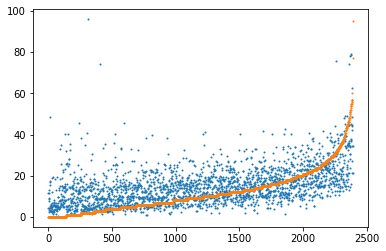

<IPython.core.display.Javascript object>

In [27]:
# Produce scatter plots of error for predominantly hispanic tracts
df_test["true"] = y_test
df_test["pred"] = y_pred

hisp = df_test[df_test["pct-hispanic"] > 75]
hisp = hisp.sort_values("evictions")

plt.scatter(np.arange(len(hisp)), hisp["pred"], s=1)
plt.scatter(np.arange(len(hisp)), hisp["true"], s=1)

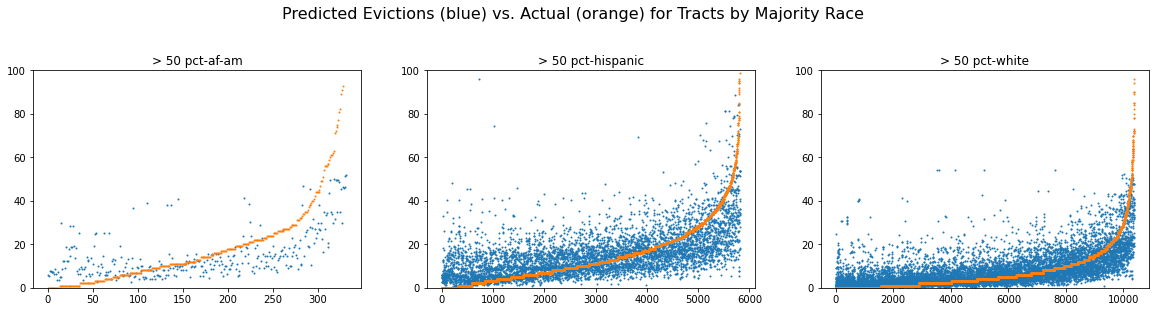

<IPython.core.display.Javascript object>

In [28]:
# Produce same plot side by side for different populations
fig, axes = plt.subplots(1, 3)
fig.set_figwidth(20)
fig.suptitle(
    "Predicted Evictions (blue) vs. Actual (orange) for Tracts by Majority Race",
    fontsize=16,
    y=1.1,
)

# Abstract plotting into helper function to plot the error for each population
def plot_error_for_pop(pop_name, ax, thresh=50):
    pop = df_test[df_test[pop_name] > thresh]
    pop = pop.sort_values("evictions")
    ax.scatter(np.arange(len(pop)), pop["pred"], s=1)
    ax.scatter(np.arange(len(pop)), pop["true"], s=1)
    ax.set_ylim(0, 100)
    ax.set_title(f"> {thresh} {pop_name}")


for ax, pop_name in zip(axes, ["pct-af-am", "pct-hispanic", "pct-white"]):
    plot_error_for_pop(pop_name, ax)

 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

In the Random Forest model above, we used `mse` (mean-squared error) as the loss function. Mean-squared error is affected more by outliers than mean-absolute error. 

 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

<span style="color:green">**\*\*Discussion: Are there concerns about model explainability? Take some time to explore the data.\*\***</span> 

In [29]:
model_pipeline.named_steps["model"].feature_importances_
feature_importance = pd.DataFrame.from_dict(
    {
        "features": FEATURE_VARS,
        "importance": model_pipeline.named_steps["model"].feature_importances_,
    }
)
print(
    feature_importance.sort_values("importance", ascending=False).reset_index(drop=True)
)

                     features  importance
0  renter-occupied-households    0.425646
1       median-property-value    0.215394
2                poverty-rate    0.078628
3                        year    0.067333
4                  population    0.053983
5                 rent-burden    0.045774
6     median-household-income    0.040545
7           median-gross-rent    0.040022
8         pct-renter-occupied    0.032674


<IPython.core.display.Javascript object>

 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

<span style="color:green">**\*\*Discussion: What are shortcomings or limitations of our model we should be concerned about?.\*\***</span> 

## E. Deployment

 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?

This is important to consider in the context of how analysis and model results are used. Are the results used to make positive or negative interventions? What is the potential harm or inequity from incorrect model estimates?

 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?

 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?

 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*